# Tarea individual

El nombre del alumno debe estar en el nombre del notebook a continuación de 'Tarea Individual'.
<br>
Por ejemplo: <strong>Tarea Individual - Eduardo Garcia</strong>
<br>
Para cambiar el nombre: pincha en el nombre del notebook (a la derecha del icono 'Jupyter') y añade tu nombre.
<br>
<br>
Una vez se hayan resuelto los ejercicios, por favor, expórtalo a HTML y súbelo al Aula Virtual. Para exportarlo como HTML hay que pinchar en File > Download As > HTML.
<br>
<br>

### Objetivo del notebook

El objetivo de esta tarea es ser capaces de enfrentarnos a un dataset de principio a fin.
<br>
Se acerca el trabajo de fin de master y esta es una primera prueba en la que queremos empezar a asimilar conceptos y ser capaces de afrontar lo que está por venir.


##### El cliente dice...

Somos un equipo de la NBA y nuestro equipo financiero está en un momento clave de la temporada: quieren renovar jugadores e intentar traer a otros, y para ello queremos intentar entender qué dicen los datos al respecto. Es por ello que nos proporcionan un dataset con las métricas de diferentes jugadores así como su salario.
<br>

Y lo que buscan es:
 - Entender el dataset. No saben cómo tratar estos datos, y necesitan obtener conocimiento de los datos.
 - Tratar de predecir el salario. Si es posible desarrollar un modelo que prediga el salario de un deportista, sería más factible presentarse con esa cifra a la hora de negociar.

Cada muestra del dataset que se os ofrece corresponde a un jugador con unas métricas durante una temporada y el salario.
El objetivo es tratar de entender las diferentes variables que tenemos así como intentar desarrollar un modelo predictivo del salario de un deportista.

#### Proceso tarea individual

Con en cualquier proyecto de Data Science, el cliente puede no entender los datos que tiene, y por ello nos los da para que saquemos conclusiones. Y es ahí donde debemos nosotros empezar a trabajar.
<br>

Esta tarea es totalmente libre: analiza lo que consideres, transforma lo que creas conveniente, utiliza diferentes modelos y evalualos... no nos importa el resultado predictivo, sino las técnicas que has utilizado así como las conclusiones que obtienes de los datos.

Tareas a realizar:

 - <strong>Definición del sistema.</strong> Si quieres predecir el salario de un deportista, ¿cómo es el sistema que quieres desarrollar? Explícalo brevemente. 10 Puntos.
 
 - <strong>Análisis exploratorio de datos (EDA).</strong> Queremos saber qué técnicas utilizas para extraer conclusiones y ofrecer conocimiento: correlaciones, histogramas... totalmente libre. 30 Puntos.
 
 - <strong>Predicción de la variable 'Salario'.</strong> Prueba diferentes modelos de scikit-learn y alguna red neuronal y selecciona uno que sea el que quieres presentar al cliente. 30 Puntos.
 
 - <strong>Conclusiones.</strong> Explícanos, muy brevemente, qué información has obtenido del dataset así como la explicación del modelo predictivo (es óptimo o no, debe mejorar, cómo crees que se mejoraría...) 30 Puntos.

#### Importante

El resultado no es bueno o malo en base al resultado predictivo, lo que queremos es que analicéis y trabajéis con modelos predictivos para que saquéis conclusiones y las ofrezcáis. Cuando trabajamos en proyectos así no siempre se puede predecir todo, pero sí podemos sacar conclusiones de los datos que nos ofrezcan conocimiento. Por ello las conclusiones son tan importantes.


Datos: https://www.kaggle.com/koki25ando/nba-salary-prediction-using-multiple-regression#data

## 1. Definición del sistema

El objetivo de este análisis consiste en predecir el salario de diferentes deportistas de la NBA para ayudar a una de las franquicias de dicha liga a negociar mejor en el siguiente periodo de agencia libre. En primer lugar, cargamos los datos para ver qué información tenemos disponible.

In [ ]:
!pip install pandas-profiling==2.7.1

     |████████████████████████████████| 252 kB 5.0 MB/s 
     |████████████████████████████████| 58 kB 4.8 MB/s 
     |████████████████████████████████| 675 kB 55.3 MB/s 
     |████████████████████████████████| 4.7 MB 36.3 MB/s 
     |████████████████████████████████| 812 kB 56.6 MB/s 
     |████████████████████████████████| 38.1 MB 1.3 MB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=840f2ed0c2185547f9d1e38142adf7de55c2bb3be3b40de5de9a6a986630efde
  Stored in directory: /root/.cache/pip/wheels/70/e1/52/5b14d250ba868768823940c3229e9950d201a26d0bd3ee8655
  Created wheel for imagehash: filename=ImageHash-4.2.1-py2.py3-none-any.whl size=295207 sha256=2cfb1dc23109aa7aa4353ff839d70cdf392ef69c5c14db0e79d998e9e5119f4a
  Stored in directory: /root/.cache/pip/wheels/4c/d5/59/5e3e297533ddb09407769762985d134135064c6831e29a914e
Successfully built htmlmin imagehash
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstallin

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
import os

import pandas as pd
import pandas_profiling
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

from sklearn.model_selection import GridSearchCV

from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
from sklearn.metrics import mean_absolute_error

import tensorflow as tf
from tensorflow import keras

Mounted at /content/drive


In [ ]:
path = './drive/My Drive/MasterIADeporte/Modulo7_KERAS/TareaIndividual/'
dt_init = pd.read_csv(path+"nba_data.csv")
dt = dt_init
dt

,Player,Team,Salary,Year,Age,Pos,G,GS,MP,3P,3PA,2P,2PA,ORB,DRB,AST,STL,BLK,PF,PTS
0,Stephen Curry,GSW,34682550.0,2017.0,28.0,PG,79.0,79.0,2638.0,324.0,789.0,351.0,654.0,61.0,292.0,523.0,143.0,17.0,183.0,1999.0
1,LeBron James,CLE,33285709.0,2017.0,32.0,SF,74.0,74.0,2794.0,124.0,342.0,612.0,1002.0,97.0,543.0,646.0,92.0,44.0,134.0,1954.0
2,Paul Millsap,DEN,31269231.0,2017.0,31.0,PF,69.0,67.0,2343.0,75.0,241.0,355.0,731.0,111.0,422.0,252.0,90.0,62.0,186.0,1246.0
3,Gordon Hayward,BOS,29727900.0,2017.0,26.0,SF,73.0,73.0,2516.0,149.0,374.0,396.0,782.0,49.0,344.0,252.0,73.0,20.0,117.0,1601.0
4,Blake Griffin,DET,29512900.0,2017.0,27.0,PF,61.0,61.0,2076.0,38.0,113.0,441.0,858.0,111.0,385.0,300.0,58.0,23.0,157.0,1316.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
678,Quinn Cook,NOP,25000.0,2017.0,23.0,PG,9.0,0.0,111.0,6.0,12.0,16.0,29.0,1.0,3.0,14.0,3.0,0.0,7.0,52.0
679,Chris Johnson,HOU,25000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
680,Beno Udrih,DET,25000.0,2017.0,34.0,PG,39.0,0.0,560.0,11.0,32.0,81.0,165.0,6.0,51.0,131.0,13.0,0.0,29.0,227.0
681,Joel Bolomboy,MIL,22248.0,2017.0,23.0,PF,12.0,0.0,53.0,1.0,4.0,8.0,12.0,4.0,13.0,2.0,1.0,2.0,1.0,22.0


Como podemos ver en el dataset, contamos con las siguientes variables:


*   Identificador del jugador (Id): Entero autoincremental que nos muestra el identificador para nuestro dataset de cada jugador.
*   Nombre del jugador (Player): Cadena de texto que contiene el nombre del jugador.	
*   Código del equipo (Team): Cadena de texto de tres caracteres de longitud que nos informa del equipo al que pertenece dicho jugador.	
*   Salario del jugador (Salary): Variable numérica continua que nos informa del salario actual del jugador. Se trata de nuestra variable objetivo.	
*   Año de competición (Year): Variable numérica discreta que nos informa del año de competición que se está disputando.	
*   Edad del jugador (Age): Variable numérica discreta que nos informa de la edad del jugador en dicha temporada.	
*   Posición del jugador (Pos): Cadena de texto que nos informa de la posición del jugador en el campo (PG: Base, SG: Escolta, SF: Alero, PF: Ala-Pívot, C: Pívot)
*   Partidos jugados del jugador (G): Variable numérica discreta que nos informa de la cantidad de partidos jugados por un jugador.	
*   Partidos jugados de titular del jugador (GS): Variable numérica discreta que nos informa de la cantidad de partidos jugados por un jugador siendo titular.	
*   Minutos jugador (MP): Variable numérica discreta que nos informa de la cantidad de minutos que ha jugado dicho jugador a lo largo de la temporada.
*   Tiros triples anotados (3P): Variable numérica discreta que nos informa de la cantidad de triples anotados por el jugador a lo largo de la temporada.	
*   Tiros triples intentados (3PA): 	Variable numérica discreta que nos informa de la cantidad de triples intentados por el jugador a lo largo de la temporada.	
*   Tiros de dos anotados (2P): 	Variable numérica discreta que nos informa de la cantidad de tiros de dos anotados por el jugador a lo largo de la temporada.	
*   Tiros de dos intentados (2PA): 	Variable numérica discreta que nos informa de la cantidad de tiros de dos intentados por el jugador a lo largo de la temporada.	
*   Rebotes ofensivos (ORB): 	Variable numérica discreta que nos informa de la cantidad de rebotes ofensivos capturados por el jugador a lo largo de la temporada.	
*   Rebotes defensivos (DRB): 	Variable numérica discreta que nos informa de la cantidad de rebotes defensivos capturados por el jugador a lo largo de la temporada.	
*   Asistencias (AST): 	Variable numérica discreta que nos informa de la cantidad de asistencias generadas por el jugador a lo largo de la temporada.	
*   Robos (STL): 	Variable numérica discreta que nos informa de la cantidad de balones robados por el jugador a lo largo de la temporada.	
*   Tapones (BLK): 	Variable numérica discreta que nos informa de la cantidad de tapones realizados por el jugador a lo largo de la temporada.	
*   Faltas (PF): 	Variable numérica discreta que nos informa de la cantidad de faltas realizadas por el jugador a lo largo de la temporada.	
*   Puntos (PTS): Variable numérica discreta que nos informa de la cantidad de puntos anotados por el jugador a lo largo de la temporada.	

Nuestro conjunto de datos cuenta con 683 registros, correspondientes a los jugadores que han participado en la temporada 2017 de la NBA. Aunque es posible que existan dos registros para un mismo jugador, en caso de cambiar de equipo.



In [ ]:
len(dt['Player'].unique())

535

Al realizar la comprobación, nos damos cuenta de que es así y por lo tanto tendremos que tenerlo en cuenta para nuestro análisis. Como lo que nos importa es predecir el salario sin que importe el nombre del jugador, podemos omitir la variable jugador y partir únicamente con los datos.

Una vez tenemos en contexto qué datos tenemos y cuál es nuestra variable objetivo, podemos concluir ante qué tipo de problema nos encontramos. Al ser una variable numérica continua, se trata de un problema de regresión. Por lo tanto, nuestro sistema tiene que tratar de resolver un problema de regresión intentando acercarse lo máximo posible a la variable objetivo (Salario) a partir del resto de variables. Se trata de un problema de aprendizaje supervisado.

## 2. Análisis exploratiorio de los datos (EDA)

En primer lugar, y con el objetivo de tener una visión inicial de los datos, procedemos a obtener un perfilado inicial de los datos, mediante la utilización de pandas-profiling. Se trata de una librería que nos ayuda bastante en esta tarea. Mediante unas pocas líneas de código, conseguimos mucha información relevante para nuestro dataset.

In [ ]:
profile = pandas_profiling.ProfileReport(dt)
profile

Al realizar el perfilado de datos, podemos comprobar que existe una alta correlación entre triples anotados e intentados (como puede tener sentido), de la misma forma que entre tiros de dos anotados e intentados. Los puntos también están altamente correlados con las canastas y los intentos de dos puntos.

Además, podemos ver que existen 131 registros que no tienen valores para las siguientes variables: Year, Age, Pos, G, GS, MP, 3P, 3PA, 2P, 2PA, ORB, DRB, AST, STL, BLK, PF y PTS. 

Por lo tanto, estos registros no nos aportan más que ruido al modelo y debemos retirarlos del mismo. 

In [ ]:
dt = dt.dropna(subset=['G'])
dt

,Player,Team,Salary,Year,Age,Pos,G,GS,MP,3P,3PA,2P,2PA,ORB,DRB,AST,STL,BLK,PF,PTS
0,Stephen Curry,GSW,34682550.0,2017.0,28.0,PG,79.0,79.0,2638.0,324.0,789.0,351.0,654.0,61.0,292.0,523.0,143.0,17.0,183.0,1999.0
1,LeBron James,CLE,33285709.0,2017.0,32.0,SF,74.0,74.0,2794.0,124.0,342.0,612.0,1002.0,97.0,543.0,646.0,92.0,44.0,134.0,1954.0
2,Paul Millsap,DEN,31269231.0,2017.0,31.0,PF,69.0,67.0,2343.0,75.0,241.0,355.0,731.0,111.0,422.0,252.0,90.0,62.0,186.0,1246.0
3,Gordon Hayward,BOS,29727900.0,2017.0,26.0,SF,73.0,73.0,2516.0,149.0,374.0,396.0,782.0,49.0,344.0,252.0,73.0,20.0,117.0,1601.0
4,Blake Griffin,DET,29512900.0,2017.0,27.0,PF,61.0,61.0,2076.0,38.0,113.0,441.0,858.0,111.0,385.0,300.0,58.0,23.0,157.0,1316.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
677,Quinn Cook,NOP,25000.0,2017.0,23.0,PG,5.0,0.0,77.0,5.0,14.0,6.0,11.0,0.0,3.0,12.0,1.0,0.0,6.0,27.0
678,Quinn Cook,NOP,25000.0,2017.0,23.0,PG,9.0,0.0,111.0,6.0,12.0,16.0,29.0,1.0,3.0,14.0,3.0,0.0,7.0,52.0
680,Beno Udrih,DET,25000.0,2017.0,34.0,PG,39.0,0.0,560.0,11.0,32.0,81.0,165.0,6.0,51.0,131.0,13.0,0.0,29.0,227.0
681,Joel Bolomboy,MIL,22248.0,2017.0,23.0,PF,12.0,0.0,53.0,1.0,4.0,8.0,12.0,4.0,13.0,2.0,1.0,2.0,1.0,22.0


Del mismo modo que hemos detectado estos valores vacíos, el perfilado del dataset nos permite darnos cuenta de que teníamos razón en cuanto a que aparecían varios registros por jugador:

![image]: (/content/drive/My Drive/MasterIADeporte/Modulo7_KERAS/TareaIndividual/Image01.JPG)

Esta imagen muestra aquellos valores más comunes para la variable Player. Si vamos a las últimas filas de todo el dataset en el perfilado, podemos ver dos ejemplos de esto bastante identificativos. Se trata de dos jugadores que aparece más de una vez en el dataset: Quinn Cook y Axel Toupane.

![image]: (/content/drive/My Drive/MasterIADeporte/Modulo7_KERAS/TareaIndividual/Image02.JPG)

Al ver sus registros nos damos cuenta de que podemos sumar los valores de estas celdas y así obtener un dato más realista. De todos modos, vamos a replicar este análisis para todos los deportistas cuyo nombre aparezca en más de un registro.

In [ ]:
aux = dt['Player'].value_counts()
dt[dt['Player'].isin(aux.index[aux.gt(2)])]

,Player,Team,Salary,Year,Age,Pos,G,GS,MP,3P,3PA,2P,2PA,ORB,DRB,AST,STL,BLK,PF,PTS
39,Serge Ibaka,TOR,20061729.0,2017.0,27.0,PF,79.0,79.0,2422.0,124.0,317.0,347.0,665.0,129.0,409.0,75.0,41.0,124.0,215.0,1173.0
40,Serge Ibaka,TOR,20061729.0,2017.0,27.0,PF,56.0,56.0,1710.0,83.0,214.0,260.0,489.0,100.0,282.0,60.0,34.0,91.0,139.0,846.0
41,Serge Ibaka,TOR,20061729.0,2017.0,27.0,PF,23.0,23.0,712.0,41.0,103.0,87.0,176.0,29.0,127.0,15.0,7.0,33.0,76.0,327.0
51,DeMarcus Cousins,NOP,18063850.0,2017.0,26.0,C,72.0,72.0,2465.0,131.0,364.0,516.0,1069.0,153.0,644.0,332.0,100.0,92.0,278.0,1942.0
52,DeMarcus Cousins,NOP,18063850.0,2017.0,26.0,C,55.0,55.0,1891.0,95.0,268.0,410.0,851.0,115.0,470.0,266.0,75.0,73.0,203.0,1528.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
675,Axel Toupane,NOP,25000.0,2017.0,24.0,SF,2.0,0.0,41.0,1.0,3.0,4.0,5.0,0.0,1.0,0.0,1.0,1.0,5.0,11.0
676,Quinn Cook,NOP,25000.0,2017.0,23.0,PG,14.0,0.0,188.0,11.0,26.0,22.0,40.0,1.0,6.0,26.0,4.0,0.0,13.0,79.0
677,Quinn Cook,NOP,25000.0,2017.0,23.0,PG,5.0,0.0,77.0,5.0,14.0,6.0,11.0,0.0,3.0,12.0,1.0,0.0,6.0,27.0
678,Quinn Cook,NOP,25000.0,2017.0,23.0,PG,9.0,0.0,111.0,6.0,12.0,16.0,29.0,1.0,3.0,14.0,3.0,0.0,7.0,52.0


In [ ]:
dt[dt['Player'].isin(aux.index[aux.gt(5)])]

,Player,Team,Salary,Year,Age,Pos,G,GS,MP,3P,3PA,2P,2PA,ORB,DRB,AST,STL,BLK,PF,PTS
206,Ersan Ilyasova,ATL,6000000.0,2017.0,29.0,PF,82.0,52.0,2142.0,142.0,402.0,242.0,488.0,115.0,366.0,141.0,58.0,23.0,211.0,1071.0
207,Ersan Ilyasova,ATL,6000000.0,2017.0,29.0,PF,3.0,0.0,62.0,3.0,12.0,3.0,4.0,2.0,14.0,1.0,3.0,1.0,5.0,15.0
208,Ersan Ilyasova,ATL,6000000.0,2017.0,29.0,PF,53.0,40.0,1447.0,107.0,298.0,178.0,350.0,71.0,243.0,97.0,33.0,14.0,133.0,786.0
209,Ersan Ilyasova,ATL,6000000.0,2017.0,29.0,PF,26.0,12.0,633.0,32.0,92.0,61.0,134.0,42.0,109.0,43.0,22.0,8.0,73.0,270.0
425,DeAndre Liggins,MIL,1577230.0,2017.0,28.0,SG,62.0,19.0,777.0,17.0,46.0,38.0,96.0,20.0,88.0,54.0,47.0,14.0,81.0,152.0
426,DeAndre Liggins,MIL,1577230.0,2017.0,28.0,SG,61.0,19.0,752.0,17.0,45.0,35.0,91.0,17.0,84.0,54.0,45.0,14.0,78.0,144.0
427,DeAndre Liggins,MIL,1577230.0,2017.0,28.0,SG,1.0,0.0,25.0,0.0,1.0,3.0,5.0,3.0,4.0,0.0,2.0,0.0,3.0,8.0
457,Troy Williams,HOU,1471382.0,2017.0,22.0,SF,30.0,16.0,557.0,18.0,62.0,55.0,105.0,15.0,54.0,25.0,27.0,10.0,60.0,185.0
458,Troy Williams,HOU,1471382.0,2017.0,22.0,SF,24.0,13.0,418.0,10.0,41.0,41.0,82.0,6.0,39.0,19.0,24.0,9.0,42.0,127.0
459,Troy Williams,HOU,1471382.0,2017.0,22.0,SF,6.0,3.0,139.0,8.0,21.0,14.0,23.0,9.0,15.0,6.0,3.0,1.0,18.0,58.0


Al mostrar esta sentencia, nos damos cuenta que el primer registro correspondiente al jugador es la suma de los demás para la mayor parte de ocasiones. Hay unos casos extremos en los que hay errores de calidad en el dato y algún jugador aparece duplicado para varios equipos. De todos modos, esto lo podemos solucionar mediante un borrado de duplicados que mantenga el primer registro (el completo).

In [ ]:
dt = dt.drop_duplicates(subset='Player', keep='first')
dt

,Player,Team,Salary,Year,Age,Pos,G,GS,MP,3P,3PA,2P,2PA,ORB,DRB,AST,STL,BLK,PF,PTS
0,Stephen Curry,GSW,34682550.0,2017.0,28.0,PG,79.0,79.0,2638.0,324.0,789.0,351.0,654.0,61.0,292.0,523.0,143.0,17.0,183.0,1999.0
1,LeBron James,CLE,33285709.0,2017.0,32.0,SF,74.0,74.0,2794.0,124.0,342.0,612.0,1002.0,97.0,543.0,646.0,92.0,44.0,134.0,1954.0
2,Paul Millsap,DEN,31269231.0,2017.0,31.0,PF,69.0,67.0,2343.0,75.0,241.0,355.0,731.0,111.0,422.0,252.0,90.0,62.0,186.0,1246.0
3,Gordon Hayward,BOS,29727900.0,2017.0,26.0,SF,73.0,73.0,2516.0,149.0,374.0,396.0,782.0,49.0,344.0,252.0,73.0,20.0,117.0,1601.0
4,Blake Griffin,DET,29512900.0,2017.0,27.0,PF,61.0,61.0,2076.0,38.0,113.0,441.0,858.0,111.0,385.0,300.0,58.0,23.0,157.0,1316.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
636,Daniel Ochefu,WAS,50000.0,2017.0,23.0,C,19.0,0.0,75.0,0.0,0.0,12.0,27.0,5.0,17.0,3.0,2.0,0.0,17.0,24.0
645,Gary Payton,MIL,50000.0,2017.0,24.0,PG,6.0,0.0,99.0,1.0,9.0,7.0,13.0,0.0,12.0,13.0,3.0,4.0,9.0,20.0
669,Marcus Thornton,CLE,46080.0,2017.0,29.0,SG,33.0,1.0,575.0,28.0,80.0,56.0,130.0,22.0,54.0,41.0,19.0,3.0,48.0,219.0
673,Axel Toupane,NOP,25000.0,2017.0,24.0,SF,4.0,0.0,47.0,1.0,4.0,4.0,5.0,0.0,1.0,0.0,1.0,1.0,6.0,11.0


Finalmente, nos quedamos con 411 registros completos. A partir de ahora, vamos a analizar las columnas que tenemos para quedarnos con aquellas que nos aporten información. Para más detalle, vamos a combinar aquellas que estén correladas con cierta conocimiento del campo para obtener los campos más óptimos posibles.

Por un lado, el año siempre es el mismo (2017), por lo que no nos aporta ninguna información. El nombre del jugador es otro registro que no nos aporta nada, por lo que también podemos borrarlo. Con respecto al nombre del equipo, si bien es cierto que no debería aportar nada a la hora de calcular el salario del jugador, puede que nos resulta útil dependiendo del mercado que mueva dicha ciudad y, por lo tanto, decidimos mantenerlo. Para ello, hay que modificarlo y que deje de ser una variable categórica para que sea una variable codificado en formato one hot. Podríamos dejarla como variable numérica discreta, pero eso llevaría a error a nuestro modelo porque daría más valor a la franquicia 30 que a la franquicia 1. Lo mismo ocurre con la variable posición. La codificamos en formato one hot. Tras realizar varias pruebas concluimos que incluir las variable categóricas en formato one hot no aporta nada al resultado final del modelo. Es más, le lleva a tener un error en test más alto. Por lo tanto, se quedan comentadas.

Por otro lado, la parte de ingeniería de variables puede resultar muy útil para descartar correlaciones, calcular datos más óptimos y mejorar el modelo en sí. Una parte muy conocida dentro de la estadística avanzada del baloncesto es el cálculo de métricas por minuto o por cada x número de minutos. En la NBA, este minuto que se suele coger de referencia es el 36. Por lo tanto, en vez de calcular el número de puntos por temporada de un jugador, tendríamos el número de puntos por cada 36 minutos de dicho jugador. De esta forma, aislamos un poco la falta de minutos de algún jugador que pueda salir desde el banquillo. Para las variables de tiros de dos y tiros de tres calculamos el porcentaje de acierto y nos quedamos con los tiros anotados. De esta forma, conseguimos quitarnos dos variables correladas (tiros de 2/3 anotados e intentados) y añadimos un dato de eficiencia a nuestro modelo, como puede ser el porcentaje de acierto al tirar a canasta.

In [ ]:
# df_team = pd.get_dummies(dt['Team'], prefix='Team')
# df_team

In [ ]:
# df_pos = pd.get_dummies(dt['Pos'], prefix='Pos')
# df_pos

In [ ]:
dt = dt.drop(columns=['Player', 'Team', 'Year', 'Pos'])
dt

,Salary,Age,G,GS,MP,3P,3PA,2P,2PA,ORB,DRB,AST,STL,BLK,PF,PTS
0,34682550.0,28.0,79.0,79.0,2638.0,324.0,789.0,351.0,654.0,61.0,292.0,523.0,143.0,17.0,183.0,1999.0
1,33285709.0,32.0,74.0,74.0,2794.0,124.0,342.0,612.0,1002.0,97.0,543.0,646.0,92.0,44.0,134.0,1954.0
2,31269231.0,31.0,69.0,67.0,2343.0,75.0,241.0,355.0,731.0,111.0,422.0,252.0,90.0,62.0,186.0,1246.0
3,29727900.0,26.0,73.0,73.0,2516.0,149.0,374.0,396.0,782.0,49.0,344.0,252.0,73.0,20.0,117.0,1601.0
4,29512900.0,27.0,61.0,61.0,2076.0,38.0,113.0,441.0,858.0,111.0,385.0,300.0,58.0,23.0,157.0,1316.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
636,50000.0,23.0,19.0,0.0,75.0,0.0,0.0,12.0,27.0,5.0,17.0,3.0,2.0,0.0,17.0,24.0
645,50000.0,24.0,6.0,0.0,99.0,1.0,9.0,7.0,13.0,0.0,12.0,13.0,3.0,4.0,9.0,20.0
669,46080.0,29.0,33.0,1.0,575.0,28.0,80.0,56.0,130.0,22.0,54.0,41.0,19.0,3.0,48.0,219.0
673,25000.0,24.0,4.0,0.0,47.0,1.0,4.0,4.0,5.0,0.0,1.0,0.0,1.0,1.0,6.0,11.0


In [ ]:
profile2 = pandas_profiling.ProfileReport(dt)
profile2

In [ ]:
dt['2P%'] = dt.apply(lambda x: x['2P']/x['2PA'] if x['2PA'] > 0 else 0, axis=1)
dt['3P%'] = dt.apply(lambda x: x['3P']/x['3PA'] if x['3PA'] > 0 else 0, axis=1)
dt['GS%'] = dt.apply(lambda x: x['GS']/x['G'] if x['GS'] > 0 else 0, axis=1)
dt['PTS36M'] = dt.apply(lambda x: 36*x['PTS']/x['MP'] if x['MP'] > 0 else 0, axis=1)
dt['ORB36M'] = dt.apply(lambda x: 36*x['ORB']/x['MP'] if x['MP'] > 0 else 0, axis=1)
dt['DRB36M'] = dt.apply(lambda x: 36*x['DRB']/x['MP'] if x['MP'] > 0 else 0, axis=1)
dt['AST36M'] = dt.apply(lambda x: 36*x['AST']/x['MP'] if x['MP'] > 0 else 0, axis=1)
dt['STL36M'] = dt.apply(lambda x: 36*x['STL']/x['MP'] if x['MP'] > 0 else 0, axis=1)
dt['BLK36M'] = dt.apply(lambda x: 36*x['BLK']/x['MP'] if x['MP'] > 0 else 0, axis=1)
dt['PF36M'] = dt.apply(lambda x: 36*x['PF']/x['MP'] if x['MP'] > 0 else 0, axis=1)
dt['2P36M'] = dt.apply(lambda x: 36*x['2P']/x['MP'] if x['MP'] > 0 else 0, axis=1)
dt['3P36M'] = dt.apply(lambda x: 36*x['3P']/x['MP'] if x['MP'] > 0 else 0, axis=1)
dt['MPG'] = dt.apply(lambda x: x['MP']/x['G'] if x['G'] > 0 else 0, axis=1)
dt['Salary'] = dt.apply(lambda x: x['Salary']/1000000, axis=1)
dt = dt.drop(columns=['G', 'MP', '3P', '3PA', '2P', '2PA', 'PTS', 'GS', 'ORB', 'DRB', 'AST', 'STL', 'BLK', 'PF'])
dt

,Salary,Age,2P%,3P%,GS%,PTS36M,ORB36M,DRB36M,AST36M,STL36M,BLK36M,PF36M,2P36M,3P36M,MPG
0,34.682550,28.0,0.536697,0.410646,1.000000,27.279757,0.832449,3.984837,7.137225,1.951478,0.231994,2.497346,4.789992,4.421531,33.392405
1,33.285709,32.0,0.610778,0.362573,1.000000,25.176807,1.249821,6.996421,8.323550,1.185397,0.566929,1.726557,7.885469,1.597709,37.756757
2,31.269231,31.0,0.485636,0.311203,0.971014,19.144686,1.705506,6.483995,3.871959,1.382843,0.952625,2.857875,5.454545,1.152369,33.956522
3,29.727900,26.0,0.506394,0.398396,1.000000,22.907790,0.701113,4.922099,3.605723,1.044515,0.286169,1.674086,5.666137,2.131955,34.465753
4,29.512900,27.0,0.513986,0.336283,1.000000,22.820809,1.924855,6.676301,5.202312,1.005780,0.398844,2.722543,7.647399,0.658960,34.032787
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
636,0.050000,23.0,0.444444,0.000000,0.000000,11.520000,2.400000,8.160000,1.440000,0.960000,0.000000,8.160000,5.760000,0.000000,3.947368
645,0.050000,24.0,0.538462,0.111111,0.000000,7.272727,0.000000,4.363636,4.727273,1.090909,1.454545,3.272727,2.545455,0.363636,16.500000
669,0.046080,29.0,0.430769,0.350000,0.030303,13.711304,1.377391,3.380870,2.566957,1.189565,0.187826,3.005217,3.506087,1.753043,17.424242
673,0.025000,24.0,0.800000,0.250000,0.000000,8.425532,0.000000,0.765957,0.000000,0.765957,0.765957,4.595745,3.063830,0.765957,11.750000


In [ ]:
# dt_final = pd.merge(dt, df_team, left_index=True, right_index=True)
# dt_final = pd.merge(dt_final, df_pos, left_index=True, right_index=True)
dt_final = dt

Una vez explorados todos los datos y generadas nuevas variables, estamos preparados para comenzar a generar modelos predictivos. Sin embargo, antes de comenzar con la siguiente sección, volvemos a realizar el perfilado para obtener información interesante del dataset final.

In [ ]:
profile3 = pandas_profiling.ProfileReport(dt_final)
profile3

## 3. Desarrollo modelo predictivo

### Preparación del dataset

Obtenemos los conjuntos de train, valid y test (70/15/15) transformando nuestro dataset en un array.

In [ ]:
def splitDT(dt, label):
    labels = dt[[label]].values
    features = dt.drop([label], axis=1).values

    return features, labels

In [ ]:
# Fijamos el set de test en un 15% del original, y para entrenar el 85%.
train_set_full, test_set = train_test_split(dt_final, test_size=0.15, random_state=42)

# Set de validacion: 15% de validación y 70% de entrenamiento
train_set, valid_set = train_test_split(train_set_full, test_size=0.176, random_state=42)

In [ ]:
X_train, y_train = splitDT(train_set, 'Salary')
X_valid, y_valid = splitDT(valid_set, 'Salary')
X_test, y_test = splitDT(test_set, 'Salary')

In [ ]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

### Función para generar modelos y compararlos por MAE (Mean Absolute Error)

In [ ]:
model_comparative = pd.DataFrame(columns=['MAE'])

def AddModel(metric, value, model_comparative):

    met = pd.DataFrame(columns=['MAE'], data=[np.round(value, 3)]).xs(0)
    met.name = metric
    model_comparative = model_comparative.append(met)

    model_comparative = model_comparative.sort_values(by=['MAE'], ascending=True)
    
    return model_comparative

### Linear Regression

MAE Train Mean: 4.07
MAE Test: 4.185


,MAE
Linear Regression Model,4.185


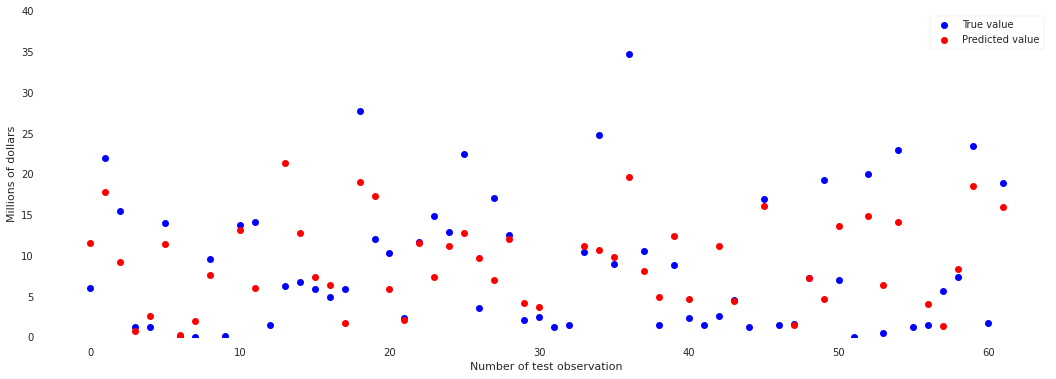

In [ ]:
# Entrenamiento
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
lin_reg_scores = cross_val_score(lin_reg, X_train, y_train, scoring="neg_mean_absolute_error", cv=10)

# Métricas Train
lin_reg_mae_train = lin_reg_scores.mean()
print("MAE Train Mean:", np.round(-lin_reg_mae_train, 3))

# Métricas Test
lin_reg_mae = mean_absolute_error(y_test, lin_reg.predict(X_test))
print("MAE Test:", np.round(lin_reg_mae, 3))

# Visualizamos
figure(num=None, figsize=(18, 6))
plt.ylim([0,40])
plt.plot(y_test, 'ob')
plt.plot(lin_reg.predict(X_test), 'or')
plt.xlabel('Number of test observation')
plt.ylabel('Millions of dollars')
plt.legend(['True value', 'Predicted value'])

# Añadir a la tabla comparativa
model_comparative = AddModel('Linear Regression Model', lin_reg_mae, model_comparative)
model_comparative.sort_values(by=['MAE'], ascending=True).head()

### Decision Tree

MAE Train Mean: 3.868
MAE Test: 5.036


,MAE
Linear Regression Model,4.185
Decision Tree Model,5.036


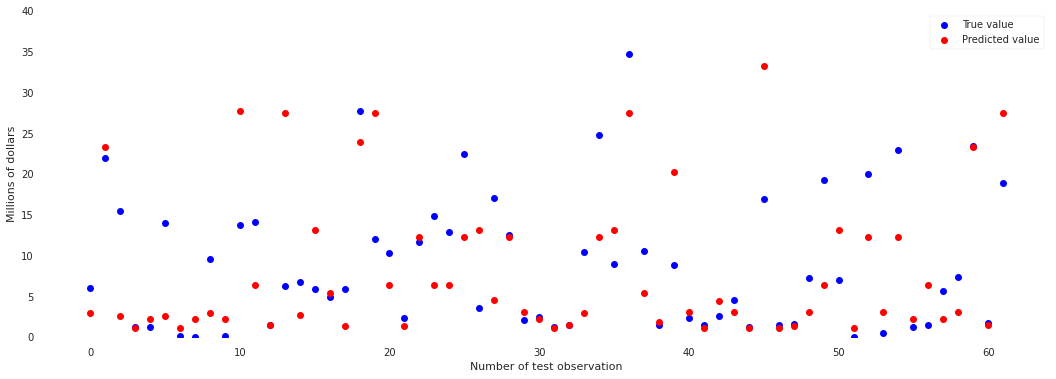

In [ ]:
# Entrenamiento
tree_reg = DecisionTreeRegressor(max_depth=6)
tree_reg.fit(X_train, y_train)
tree_reg_scores = cross_val_score(tree_reg, X_train, y_train, scoring="neg_mean_absolute_error", cv=10)

# Métricas Train
tree_reg_mae_train = tree_reg_scores.mean()
print("MAE Train Mean:", np.round(-tree_reg_mae_train, 3))

# Métricas Test
tree_reg_mae = mean_absolute_error(y_test, tree_reg.predict(X_test))
print("MAE Test:", np.round(tree_reg_mae, 3))

# Visualizamos
figure(num=None, figsize=(18, 6))
plt.ylim([0,40])
plt.plot(y_test, 'ob')
plt.plot(tree_reg.predict(X_test), 'or')
plt.xlabel('Number of test observation')
plt.ylabel('Millions of dollars')
plt.legend(['True value', 'Predicted value'])

# Añadir a la tabla comparativa
model_comparative = AddModel('Decision Tree Model', tree_reg_mae, model_comparative)
model_comparative.sort_values(by=['MAE'], ascending=True).head()

### Random Forest

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was

MAE Train Mean: 3.579
MAE Test: 3.913


,MAE
Random Forest Model,3.913
Linear Regression Model,4.185
Decision Tree Model,5.036


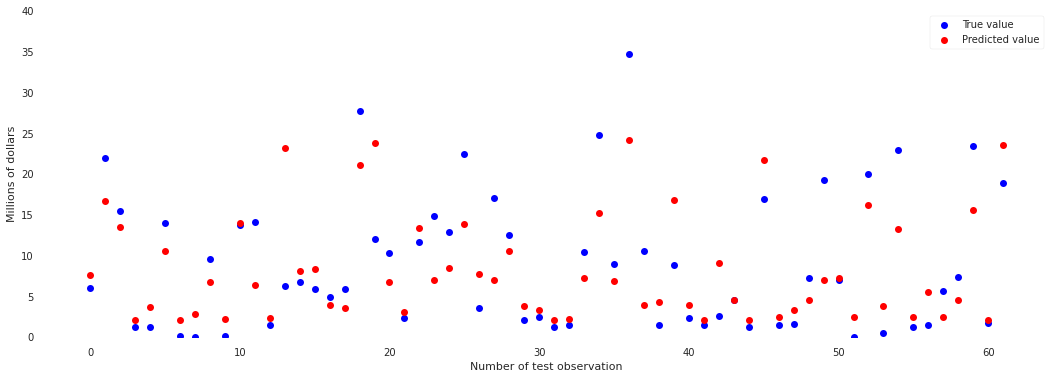

In [ ]:
# Entrenamiento
rf_reg = RandomForestRegressor(max_depth=3, random_state=0)
rf_reg.fit(X_train, y_train)
rf_reg_scores = cross_val_score(rf_reg, X_train, y_train, scoring="neg_mean_absolute_error", cv=10)

# Métricas Train
rf_reg_mae_train = rf_reg_scores.mean()
print("MAE Train Mean:", np.round(-rf_reg_mae_train, 3))

# Métricas Test
rf_reg_mae = mean_absolute_error(y_test, rf_reg.predict(X_test))
print("MAE Test:", np.round(rf_reg_mae, 3))

# Visualizamos
figure(num=None, figsize=(18, 6))
plt.ylim([0,40])
plt.plot(y_test, 'ob')
plt.plot(rf_reg.predict(X_test), 'or')
plt.xlabel('Number of test observation')
plt.ylabel('Millions of dollars')
plt.legend(['True value', 'Predicted value'])

# Añadir a la tabla comparativa
model_comparative = AddModel('Random Forest Model', rf_reg_mae, model_comparative)
model_comparative.sort_values(by=['MAE'], ascending=True).head()

### Gradient Boosting



MAE Train Mean: 3.769
MAE Test: 4.283


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y =

,MAE
Random Forest Model,3.913
Linear Regression Model,4.185
Gradient Boosting Model,4.283
Decision Tree Model,5.036


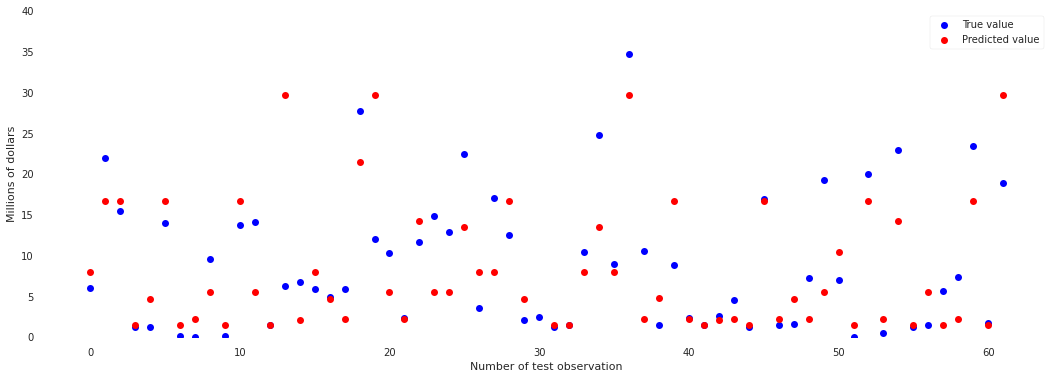

In [ ]:
# Entrenamiento
gb_reg = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=1.0)
gb_reg.fit(X_train, y_train)
gb_reg_scores = cross_val_score(gb_reg, X_train, y_train, scoring="neg_mean_absolute_error", cv=10)

# Métricas Train
gb_reg_mae_train = gb_reg_scores.mean()
print("MAE Train Mean:", np.round(-gb_reg_mae_train, 3))

# Métricas Test
gb_reg_mae = mean_absolute_error(y_test, gb_reg.predict(X_test))
print("MAE Test:", np.round(gb_reg_mae, 3))

# Visualizamos
figure(num=None, figsize=(18, 6))
plt.ylim([0,40])
plt.plot(y_test, 'ob')
plt.plot(gb_reg.predict(X_test), 'or')
plt.xlabel('Number of test observation')
plt.ylabel('Millions of dollars')
plt.legend(['True value', 'Predicted value'])

# Añadir a la tabla comparativa
model_comparative = AddModel('Gradient Boosting Model', gb_reg_mae, model_comparative)
model_comparative.sort_values(by=['MAE'], ascending=True).head()

### Artificial Neural Networks Model 1

Generamos un modelo sequencial de dos capas de 30 y 20 neuronas respectivamente.

In [ ]:
print(tf.__version__)
print(keras.__version__)

2.7.0
2.7.0


In [ ]:
model_seq = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape = X_train.shape[1:]),
    keras.layers.Dense(20, activation="relu"),
    keras.layers.Dense(1)
])

In [ ]:
model_seq.compile(loss="mean_absolute_error", optimizer="adam")
history_seq = model_seq.fit(X_train, y_train, epochs=100, validation_data = (X_valid, y_valid))

Epoch 1/100
9/9 [==============================] - 1s 25ms/step - loss: 7.1775 - val_loss: 6.9588
Epoch 2/100
9/9 [==============================] - 0s 5ms/step - loss: 6.7794 - val_loss: 6.6039
Epoch 3/100
9/9 [==============================] - 0s 5ms/step - loss: 6.4037 - val_loss: 6.2638
Epoch 4/100
9/9 [==============================] - 0s 5ms/step - loss: 6.0793 - val_loss: 5.9635
Epoch 5/100
9/9 [==============================] - 0s 5ms/step - loss: 5.8015 - val_loss: 5.7174
Epoch 6/100
9/9 [==============================] - 0s 5ms/step - loss: 5.5652 - val_loss: 5.4848
Epoch 7/100
9/9 [==============================] - 0s 5ms/step - loss: 5.3226 - val_loss: 5.2652
Epoch 8/100
9/9 [==============================] - 0s 6ms/step - loss: 5.1085 - val_loss: 5.0379
Epoch 9/100
9/9 [==============================] - 0s 7ms/step - loss: 4.9331 - val_loss: 4.7938
Epoch 10/100
9/9 [==============================] - 0s 5ms/step - loss: 4.7148 - val_loss: 4.5942
Epoch 11/100
9/9 [==========

2/2 [==============================] - 0s 5ms/step - loss: 3.7155


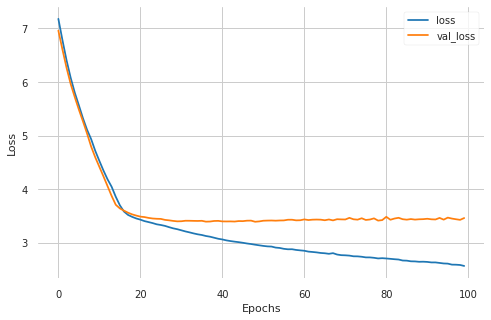

In [ ]:
ann_seq_mae = model_seq.evaluate(X_test, y_test)
# Learning Curves
pd.DataFrame(history_seq.history).plot(figsize=(8,5))
plt.grid(True)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

MAE Mean: 3.715


,MAE
ANN Sequential Model,3.715
Random Forest Model,3.913
Linear Regression Model,4.185
Gradient Boosting Model,4.283
Decision Tree Model,5.036


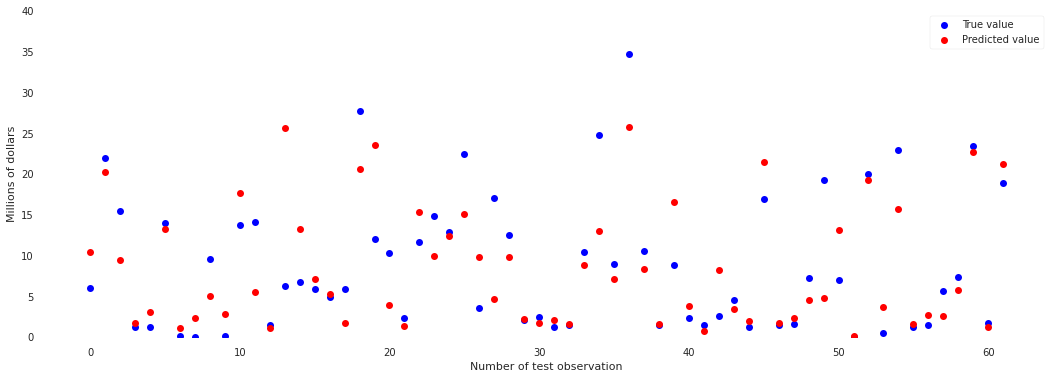

In [ ]:
# Métricas
print("MAE Mean:", np.round(ann_seq_mae, 3))

# Visualizamos
figure(num=None, figsize=(18, 6))
plt.ylim([0,40])
plt.plot(y_test, 'ob')
plt.plot(model_seq.predict(X_test), 'or')
plt.xlabel('Number of test observation')
plt.ylabel('Millions of dollars')
plt.legend(['True value', 'Predicted value'])

# Añadir a la tabla comparativa
model_comparative = AddModel('ANN Sequential Model', ann_seq_mae, model_comparative)
model_comparative.sort_values(by=['MAE'], ascending=True).head()

### Artificial Neural Network with Fine Tuning

Ahora aplicamos Early Stopping y Fine Tuning a nuestro modelo para conseguir mejores resultados que los obtenidos previamente.

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=1, min_delta=0.001)

model_ft = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape = X_train.shape[1:]),
    keras.layers.Dense(20, activation="relu"),
    keras.layers.Dense(1)
])

model_ft.compile(loss="mean_absolute_error", optimizer="adam")

history_ft = model_ft.fit(X_train, y_train, epochs=100, validation_data = (X_valid, y_valid), callbacks=[callback])

Epoch 1/100
9/9 [==============================] - 1s 20ms/step - loss: 7.3662 - val_loss: 7.1473
Epoch 2/100
9/9 [==============================] - 0s 5ms/step - loss: 7.0454 - val_loss: 6.8667
Epoch 3/100
9/9 [==============================] - 0s 4ms/step - loss: 6.7380 - val_loss: 6.5904
Epoch 4/100
9/9 [==============================] - 0s 5ms/step - loss: 6.4529 - val_loss: 6.3416
Epoch 5/100
9/9 [==============================] - 0s 6ms/step - loss: 6.2227 - val_loss: 6.1099
Epoch 6/100
9/9 [==============================] - 0s 5ms/step - loss: 5.9975 - val_loss: 5.8869
Epoch 7/100
9/9 [==============================] - 0s 5ms/step - loss: 5.7792 - val_loss: 5.6881
Epoch 8/100
9/9 [==============================] - 0s 5ms/step - loss: 5.5810 - val_loss: 5.4898
Epoch 9/100
9/9 [==============================] - 0s 5ms/step - loss: 5.4003 - val_loss: 5.3135
Epoch 10/100
9/9 [==============================] - 0s 5ms/step - loss: 5.2354 - val_loss: 5.1398
Epoch 11/100
9/9 [==========

2/2 [==============================] - 0s 7ms/step - loss: 4.4848


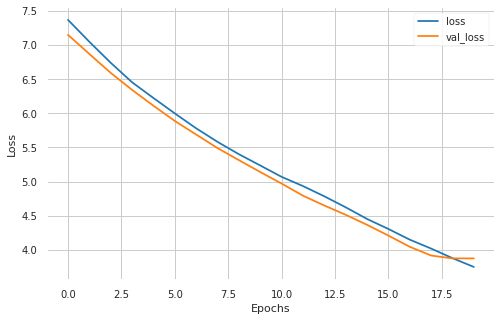

In [ ]:
ann_ft_mae = model_ft.evaluate(X_test, y_test)

# Learning Curves
pd.DataFrame(history_ft.history).plot(figsize=(8,5))
plt.grid(True)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

MAE Mean: 4.485


,MAE
ANN Sequential Model,3.715
Random Forest Model,3.913
Linear Regression Model,4.185
Gradient Boosting Model,4.283
ANN Sequential Model - Early Stopping and Fine Tuning,4.485


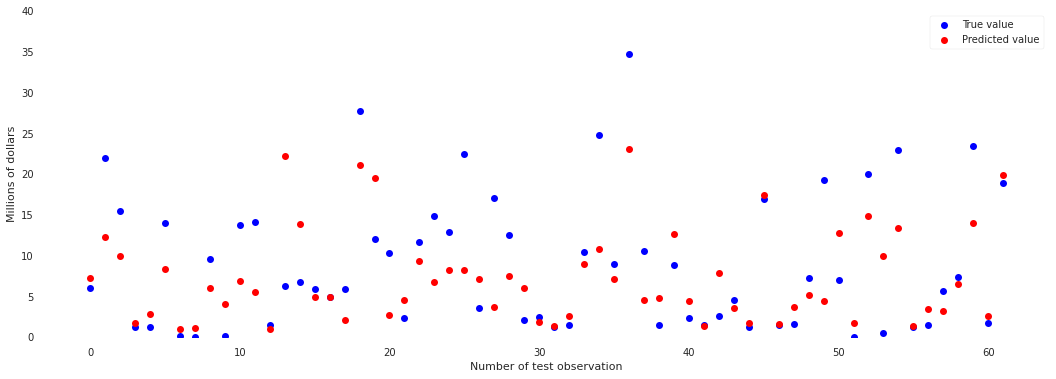

In [ ]:
# Métricas
print("MAE Mean:", np.round(ann_ft_mae, 3))

# Visualizamos
figure(num=None, figsize=(18, 6))
plt.ylim([0,40])
plt.plot(y_test, 'ob')
plt.plot(model_ft.predict(X_test), 'or')
plt.xlabel('Number of test observation')
plt.ylabel('Millions of dollars')
plt.legend(['True value', 'Predicted value'])

# Añadir a la tabla comparativa
model_comparative = AddModel('ANN Sequential Model - Early Stopping and Fine Tuning', ann_ft_mae, model_comparative)
model_comparative.sort_values(by=['MAE'], ascending=True).head()

### Artificial Neural Network with Grid Search CV

Por último, aplicamos un grid search a nuestra red neuronal artificial para probar distintas configuraciones de modelos y comprobar así si mejoran nuestros resultados al aplicar el grid.

In [ ]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

param_distribs = {
    "n_hidden": [1, 2],
    "n_neurons": [5, 10, 15, 20, 25, 30, 40]
}

def build_model(n_hidden=1, n_neurons=1, input_shape=[14]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    count = 0
    
    for layer in range(n_hidden):
      count += 1 
      model.add(keras.layers.Dense(int(n_neurons/count), activation='relu'))
        
    model.add(keras.layers.Dense(1))
    
    model.compile(loss="mean_absolute_error", optimizer='adam')
    
    return model

keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

grid_search_cv = GridSearchCV(keras_reg, param_distribs, cv=3)
grid_search_cv.fit(X_train, y_train, epochs=500, validation_data = (X_valid, y_valid), callbacks=[callback])

model = grid_search_cv.best_estimator_.model

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.


Se han truncado las últimas 5000 líneas del flujo de salida.
6/6 [==============================] - 0s 9ms/step - loss: 6.4719 - val_loss: 6.2872
Epoch 18/500
6/6 [==============================] - 0s 9ms/step - loss: 6.4033 - val_loss: 6.2213
Epoch 19/500
6/6 [==============================] - 0s 10ms/step - loss: 6.3346 - val_loss: 6.1577
Epoch 20/500
6/6 [==============================] - 0s 9ms/step - loss: 6.2728 - val_loss: 6.0975
Epoch 21/500
6/6 [==============================] - 0s 9ms/step - loss: 6.2132 - val_loss: 6.0391
Epoch 22/500
6/6 [==============================] - 0s 8ms/step - loss: 6.1555 - val_loss: 5.9816
Epoch 23/500
6/6 [==============================] - 0s 10ms/step - loss: 6.0961 - val_loss: 5.9275
Epoch 24/500
6/6 [==============================] - 0s 12ms/step - loss: 6.0293 - val_loss: 5.8765
Epoch 25/500
6/6 [==============================] - 0s 11ms/step - loss: 5.9731 - val_loss: 5.8215
Epoch 26/500
6/6 [==============================] - 0s 9ms/step - 

In [ ]:
grid_search_cv.best_params_

{'n_hidden': 2, 'n_neurons': 5}

In [ ]:
grid_search_cv.cv_results_

{'mean_fit_time': array([14.89921673,  9.61183182,  7.10140069,  6.66155012,  5.10273703,
         4.13460946,  4.34684658,  8.80646992,  5.43315276,  4.41527359,
         3.3467931 ,  3.51135047,  3.21899056,  3.24465005]),
 'mean_score_time': array([0.20284677, 1.86341325, 1.69712536, 2.45055612, 1.78643489,
        0.6893088 , 1.3909115 , 5.51434223, 0.91577816, 0.27503514,
        0.58056815, 0.15851831, 0.35999282, 0.29741025]),
 'mean_test_score': array([-3.73641388, -3.70475062, -3.76370891, -3.70505389, -3.69794067,
        -3.78725354, -3.72131824, -3.53433879, -3.9416035 , -3.74734076,
        -3.68183382, -3.68930872, -3.8808016 , -3.70313835]),
 'param_n_hidden': masked_array(data=[1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2],
              mask=[False, False, False, False, False, False, False, False,
                    False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_n_neurons': masked_array(data=[5, 10, 15, 20, 25, 30, 4

2/2 [==============================] - 0s 5ms/step - loss: 4.1629
MAE Mean: 4.163


,MAE
ANN Sequential Model,3.715
Random Forest Model,3.913
ANN Sequential Model - GridSearchCV,4.163
Linear Regression Model,4.185
Gradient Boosting Model,4.283


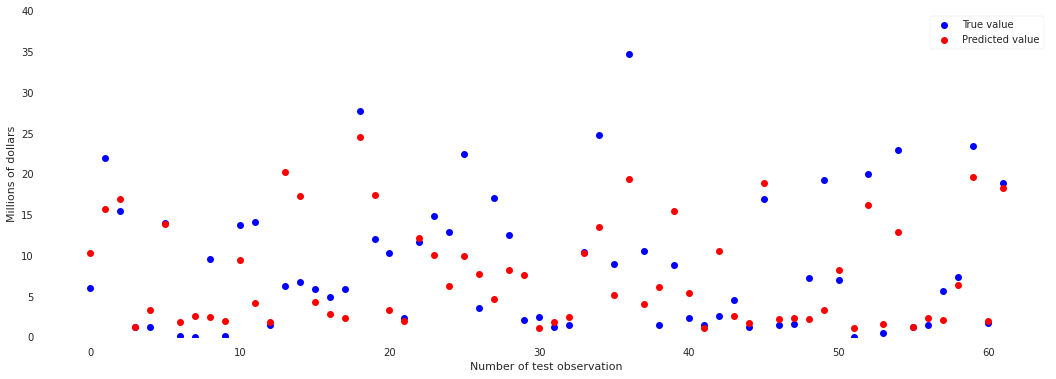

In [ ]:
grid_search_cv.best_params_
ann_mae = model.evaluate(X_test, y_test)

# Métricas
print("MAE Mean:", np.round(ann_mae, 3))

# Visualizamos
figure(num=None, figsize=(18, 6))
plt.ylim([0,40])
plt.plot(y_test, 'ob')
plt.plot(model.predict(X_test), 'or')
plt.xlabel('Number of test observation')
plt.ylabel('Millions of dollars')
plt.legend(['True value', 'Predicted value'])

# Añadir a la tabla comparativa
model_comparative = AddModel('ANN Sequential Model - GridSearchCV', ann_mae, model_comparative)
model_comparative.sort_values(by=['MAE'], ascending=True).head()

### Top 5 Models

In [ ]:
model_comparative.sort_values(by=['MAE'], ascending=True).head()

,MAE
ANN Sequential Model,3.715
Random Forest Model,3.913
ANN Sequential Model - GridSearchCV,4.163
Linear Regression Model,4.185
Gradient Boosting Model,4.283


### Entendiendo los resultados

Vamos a intentar ver que nos ofrecen estos resultados prediciendo para ciertos jugadores, viendo sus estadísticas y concluyendo qué fichajes podrían ser de interés.

In [ ]:
X_test_inverse = scaler.inverse_transform(X_test)
df_pruebas = pd.DataFrame(data=X_test_inverse)
df_prueba01 = pd.merge(dt, dt_init['Player'], left_index=True, right_index=True)
df_prueba02 = pd.merge(df_pruebas, df_prueba01[['Player', 'Salary', '2P%', '3P%']], left_on=[1, 2], right_on=['2P%', '3P%'])
df_test_prueba = pd.DataFrame(rf_reg.predict(X_test), columns=['SalaryPredicted'])
df_prueba_final = pd.merge(df_prueba02[['Player', 'Salary']], df_test_prueba, left_index=True, right_index=True)
df_prueba_final['DifferenceSalary'] = df_prueba_final['SalaryPredicted'] - df_prueba_final['Salary']

In [ ]:
df_prueba_final.sort_values(by='DifferenceSalary', ascending=False)[:12]

,Player,Salary,SalaryPredicted,DifferenceSalary
13,Isaiah Thomas,6.261395,23.166489,16.905094
19,Kemba Walker,12.000000,23.836417,11.836417
39,Avery Bradley,8.808989,16.779493,7.970504
42,Myles Turner,2.569920,9.165203,6.595283
61,Kyrie Irving,18.868625,23.581404,4.712779
45,Goran Dragic,17.000450,21.684983,4.684533
26,Will Barton,3.533333,7.789699,4.256366
56,Joe Harris,1.524305,5.547340,4.023035
53,Jordan Farmar,0.510921,3.890178,3.379257
38,Richaun Holmes,1.471382,4.373424,2.902042


Podemos observar que, dentro del conjunto de test, tenemos a los siguientes jugadores infravalorados según nuestro modelo. En primer lugar y con casi 17 millones de dólares de diferencia se encuentra Isaiah Thomas. Si recordáis ese año, Isaiah Thomas se convirtió en estrella en Boston tras anotar 28.9 puntos por partido y ser uno de los jugadores revelación de la temporada. Durante gran parte de la temporada fue el jugador que más puntos anotaba en el último cuarto y ganó varios partidos con actuaciones sobresalientes. En aquel momento de su carrera, su proyección era la de una estrella y con su sueldo para 2017 (6.26 millones de dólares) su fichaje era muy recomendable. Sin embargo, se trata de un jugador bajito, muy dependiente de su juego ofensivo y nada interesante en defensa y que requiere la pelota para brillar. Desde 2017, ha jugado 87 partidos, 11 más en 5 temporadas que los que jugó en aquella maravillosa temporada 2017. Su juego no ha vuelto a ser el mismo, su condición de estrella quedó relegada a un segundo plano en los equipos en los que jugó y nunca volvimos a ver a dicha estrella.

Es por ello que los datos no nos pueden guiar en nuestras decisiones sin tener en cuenta otros factores. El deporte es mucho más complejo que una ristra de números. De todos modos, voy a continuar con la lista mencionando unos pocos jugadores más.

Le siguen en la lista Kemba Walker (puesto 2) y Kyrie Irving (puesto 5), dos bases de primer nivel (al menos en aquel momento) que no han tenido tal caída en sus números como Isaiah Thomas pero tampoco han conseguido brillar más allá de lo que venían haciendo en esas temporadas. Kyrie Irving fue campeón con Cleveland en 2016, siendo clave durante todo el PlayOff y ganando el anillo con un triple suyo en el último minuto ante GSW. Ahora, no juega porque no está vacunado. Kemba, por su parte, demostró tener un nivel excelso mientras estuvo en Charlotte pero al irse a Boston su rendimiento bajó y se le ha puesto en duda allí casi desde su llegada. Es curioso que ambos jugadores resultaron ser el relevo (primero Kyrie y luego Kemba) de Isaiah en Boston.

Avery Bradley resultó ser un jugador muy importante en Boston (otra vez) en aquel año con muy buenas cifras reboteadoras para un escolta y buenos números en anotación, pero esta temporada resultó ser la mejor de su carrera. En un caso parecido al de Thomas, no consiguió regularidad en sus próximos años y sus número fueron cayendo poco a poco hasta ser un jugador de rotación más.

Myles Turner, sophomore por aquel momento en Indiana ha demostrado en lo que lleva en la NBA ser un excelso taponador y un jugador cumplidor pero con carencias. Le falla el rebote y el juego al poste, cosa que combina muy bien con su compañero Domantas Sabonis. Un fichaje muy interesante para aquel año.

In [ ]:
df_prueba_final.sort_values(by='DifferenceSalary', ascending=True)[:12]

,Player,Salary,SalaryPredicted,DifferenceSalary
49,Allen Crabbe,19.332500,7.022795,-12.309705
36,Stephen Curry,34.682550,24.202711,-10.479839
27,Evan Turner,17.131148,7.004751,-10.126397
54,J.J. Redick,23.000000,13.331556,-9.668444
34,Otto Porter,24.773250,15.257869,-9.515381
25,Steven Adams,22.471910,13.938678,-8.533232
59,Dwight Howard,23.500000,15.602715,-7.897285
23,Andre Iguodala,14.814815,6.984398,-7.830417
11,Joe Ingles,14.136364,6.379902,-7.756462
37,Omer Asik,10.595505,4.016873,-6.578632


Para los jugadores más sobrevalorados, vemos dos patrones claros. Aquellos jugadores que cobran mucho dinero a pesar de que su rendimiento sea muy bueno siguen apareciendo en esta lista (Stephen Curry, DeMar DeRozan, Rudy Gobert) y jugadores que resultaron ser peores de lo que decía su ficha.

Por ejemplo, Allen Crabbe. No se a quien engañó para embolsarse 20 millones de dólares cuando lo más destacable que había hecho en la liga había sido meter 10 puntos por partido con un nada desdeñable 44% en tiros de tres.

Otto Porer Jr, otra jugador que parecía que iba a llegar lejos, pero se quedó en el camino. Sin embargo, cobrar 24 millones de dólares por un producto sin que hubiera explotado realmente es demasiado.

Otros jugadores como Dwight Howard, Steven Adams o JJ Reddick pudieron tener un mejor o peor desempeño durante la siguientes temporadas, pero es evidente que a pesar de no llegar a "cumplir" estadísticamente sus sueldos (demasiado altos) tenían cierto caché en la NBA por cumplir a la perfección sus roles.

Un ejemplo distinto de los anteriores es André Iguodala. Si descartamos su época a finales de la década de los 2.000 en Philadelphia donde era un Two Way Player de bastante nivel ofensivo, nunca destacó por mirar mucho al aro. En un equipo donde están Klay Thompson o Stephen Curry, ¿para qué te vas a especializar en meterla? El MVP de las finales de 2015 se embolsaba casi 15 millones de dólares con un rendimiento ofensivo bastante pobre, pero con un nivel de baloncesto defensivo y de intangibles en el campo que también se merece un buen sueldo.

Todos estos son ejemplos de que los datos no tienen la razón por encima de cualquier razonamiento, y esto se podría hacer extensible a cada uno de los jugadores que están en este conjunto de test.

## 4. Conclusiones

En primer lugar, he de mencionar que se trata de una tarea plausible, la de analizar el salario de los deportistas que juegan en la NBA a partir de sus datos estadísticos. Los resultados se han acercado bastante al valor real de dicho jugador. Además, es preciso tener en cuenta que hay jugadores que pueden estar cobrando más dinero o menos por circunstancias que poco tengan que ver con sus estadísticas partido a partido (la temporada regular en NBA no es tan importante como las competiciones domésticas de fútbol en Europa por ejemplo). 

En segundo lugar, en cuanto a la manipulación de los datos y la ingeniería de variables, considero que se han generado variables muy interesantes y se ha dejado el dataset únicamente con las variables que hacía falta para realizar el análisis. En esta parte, se podría haber buscado información a nivel de equipo para cruzarla con el equipo, o información a nivel histórica del jugador para cruzar con su nombre y así obtener más variables de interés para el modelo. Sin embargo, esta parte se alejaba un poco del alcance del ejercicio.

En cuanto a los modelos y sus resultados, resulta sorprendente que ciertos modelos tengan peores resultados que otros y desalentador que el modelo que más resalte sobre los demás sea uno sobreajustado (el ANN Sequential Model). 

Como podemos observar en la tabla de modelos, no hay una gran mejoría entre modelos de Machine Learning clásico y redes neuronales propias del Deep Learning. Esto es así porque la complejidad del dataset no es lo suficientemente grande como para que los patrones del dataset no puedan ser aprendidos de ambas formas. Si ampliáramos nuestro dataset de las formas mencionadas y algunas más, como ampliar estos mismos datos para 10, 20 o 30 temporadas, podríamos llegar a mejores resultados con redes neuronales que con algoritmos clásicos de Machine Learning.

El ejemplo del "mejor" modelo es claro ejemplo de lo mencionado, pues el modelo con 100 épocas y 2 capas densas de neuronas es capaz de comenzar a sobreajustar a partir de la época 20 y, sin embargo, es el que mejor resultado reporta. Resulta ser un modelo sobreentrenado para la muestra de entrenamiento pero que obtiene buenos resultados en el conjunto de test.

Si analizamos el grid de una forma más profunda, podríamos ver que el error en validación de los mejores modelos se sitúan por debajo que el error en test para el modelo sobreajustado que a la postre encabeza nuestra lista. Esto es así porque al solo tener unos 70 registros, la variabilidad de un dataset con respecto a otro puede ser muy grande solo por tener uno o dos valores atípicos que el otro dataset no tenga. Hacer un análisis de valores atípicos para descartar el 5% por con más salario y el 5% con menos salario sería otra alternativa a seguir para mejorar el desempeño.

Los resultados al predecir el conjunto de test a partir de los datos de entrenamiento nos llevan a conclusiones muy interesantes, como que ciertos jugadores rindieron por encima de su sueldo o que otros rindieron por debajo. Esto se comprueba al analizar dicho conjunto muestra por muestra, aunque ciertos detalles como la cantidad de datos son considerablemente mejorables.

Resumiendo, los resultados globales no son óptimos, pero tienen una base bastante sólida. De entrada, los sueldos no son directamente proporcionales al rendimiento, por lo que nuestro modelo podría estar encontrando perlas ocultas que deberían cobrar más de lo que se les paga pero no ocurre por su situación desconocida en la liga. También podría estar encontrando jugadores cuyo rendimiento es menor a lo que cobran. Al ser una sóla temporada, esto no tiene una validez muy grande, porque se puede tratar de una temporada buena o mala de dichos jugadores.

In [ ]:
%%shell
jupyter nbconvert --to html "TareaIndividual_JoseManuelPerez.ipynb"

[NbConvertApp] Converting notebook TareaIndividual_JoseManuelPerez.ipynb to html
[NbConvertApp] Writing 59430455 bytes to TareaIndividual_JoseManuelPerez.html
